In [1]:
from sktime.datasets import load_airline

In [2]:
airline = load_airline()

In [3]:
airline[:10]

0    112
1    118
2    132
3    129
4    121
5    135
6    148
7    148
8    136
9    119
Name: Airline, dtype: int64

In [5]:
airline[:50]

0     112
1     118
2     132
3     129
4     121
5     135
6     148
7     148
8     136
9     119
10    104
11    118
12    115
13    126
14    141
15    135
16    125
17    149
18    170
19    170
20    158
21    133
22    114
23    140
24    145
25    150
26    178
27    163
28    172
29    178
30    199
31    199
32    184
33    162
34    146
35    166
36    171
37    180
38    193
39    181
40    183
41    218
42    230
43    242
44    209
45    191
46    172
47    194
48    196
49    196
Name: Airline, dtype: int64

In [ ]:
# Independent variable vs dependent variable
X = (n * k)
y = (n * 1)

In [ ]:
reg = DecisionTreeRegressor()
reg.fit(X,y)

In [ ]:
reg.predict(y_new)

# Reduction Approach (y)

In [6]:
list(range(len(airline)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143]

In [7]:
features = []
target = []

for i in range(len(airline)-10):
    features.append(airline[i:i+10])
    target.append(airline[i+10])

In [8]:
import numpy as np
features = np.array(features)
target = np.array(target)

In [9]:
features

array([[112, 118, 132, ..., 148, 136, 119],
       [118, 132, 129, ..., 136, 119, 104],
       [132, 129, 121, ..., 119, 104, 118],
       ...,
       [405, 417, 391, ..., 622, 606, 508],
       [417, 391, 419, ..., 606, 508, 461],
       [391, 419, 461, ..., 508, 461, 390]], dtype=int64)

In [10]:
features.shape

(134, 10)

In [11]:
target

array([104, 118, 115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114,
       140, 145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166,
       171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194, 196,
       196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201, 204, 188,
       235, 227, 234, 264, 302, 293, 259, 229, 203, 229, 242, 233, 267,
       269, 270, 315, 364, 347, 312, 274, 237, 278, 284, 277, 317, 313,
       318, 374, 413, 405, 355, 306, 271, 306, 315, 301, 356, 348, 355,
       422, 465, 467, 404, 347, 305, 336, 340, 318, 362, 348, 363, 435,
       491, 505, 404, 359, 310, 337, 360, 342, 406, 396, 420, 472, 548,
       559, 463, 407, 362, 405, 417, 391, 419, 461, 472, 535, 622, 606,
       508, 461, 390, 432], dtype=int64)

In [12]:
target.shape

(134,)

In [13]:
airline.shape

(144,)

In [15]:
train_len = int(len(target) * 0.80)

In [16]:
train_len

107

In [17]:
train_features = features[:train_len]
train_target = target[:train_len]
test_features = features[train_len:]
test_target = target[train_len:]

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
reg = DecisionTreeRegressor()

In [20]:
reg.fit(train_features, train_target)

DecisionTreeRegressor()

In [21]:
train_features.shape

(107, 10)

In [ ]:
reg.predict()

In [22]:
from sktime.forecasting.model_selection import temporal_train_test_split

In [23]:
from sktime.forecasting.compose import ReducedRegressionForecaster

In [39]:
regressor = DecisionTreeRegressor()
reduced_reg = ReducedRegressionForecaster(regressor = regressor, window_length=10)

In [40]:
y_train, y_test = temporal_train_test_split(airline, test_size = 36)

In [41]:
reduced_reg.fit(y_train)

RecursiveRegressionForecaster(regressor=DecisionTreeRegressor())

In [42]:
y_pred = reduced_reg.predict(np.arange(1,37))

In [43]:
from sktime.utils.plotting.forecasting import plot_ys

In [44]:
import matplotlib.pyplot as plt

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x262122b7be0>)

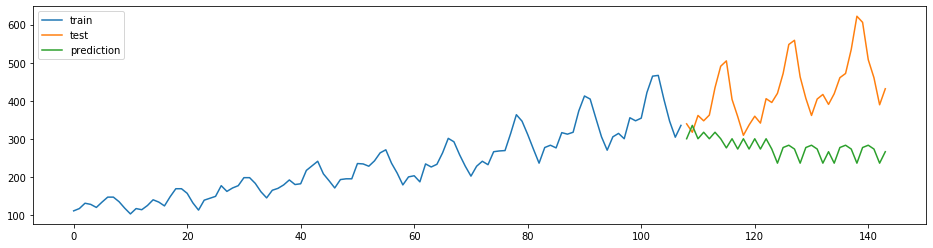

In [45]:
plot_ys(y_train, y_test, y_pred, labels = ["train", "test", "prediction"])